In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.linear_model import Lasso, ElasticNet, Ridge, SGDRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the csv file
df=pd.read_csv("sales_channel.csv",index_col=0)
df.head()


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 4)

In [4]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

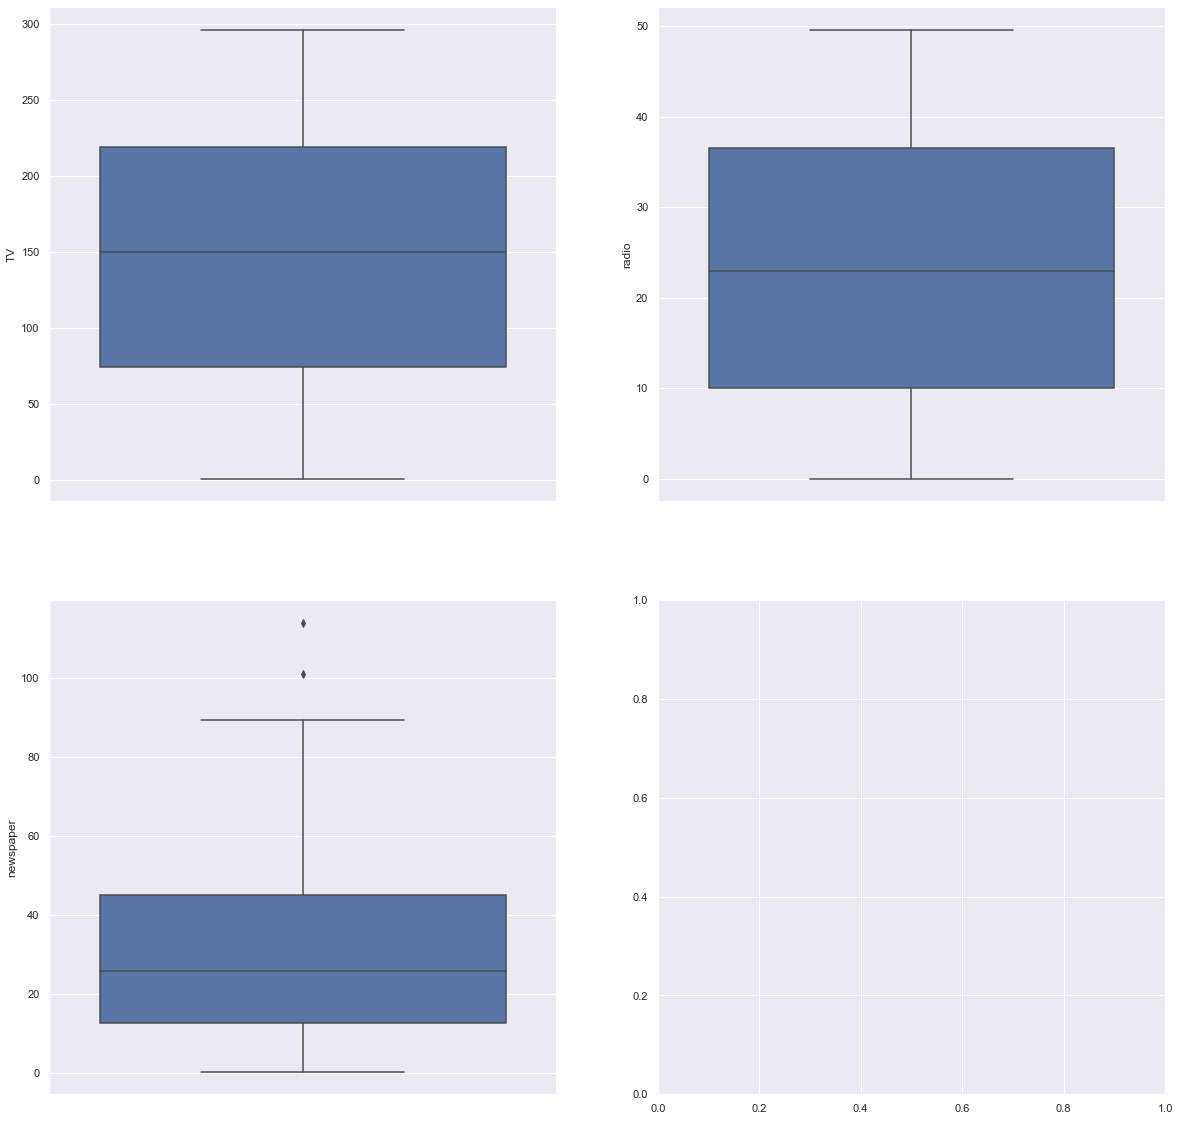

In [5]:
#visualizing the outliers
sns.set(font_scale=1.0)
fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20, 20)
sns.boxplot(x='TV',data=df,orient='v',ax=axes[0][0])
sns.boxplot(x='radio',data=df,orient='v',ax=axes[0][1])
sns.boxplot(x='newspaper',data=df,orient='v',ax=axes[1][0])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000208B5670E88>,
      dtype=object)

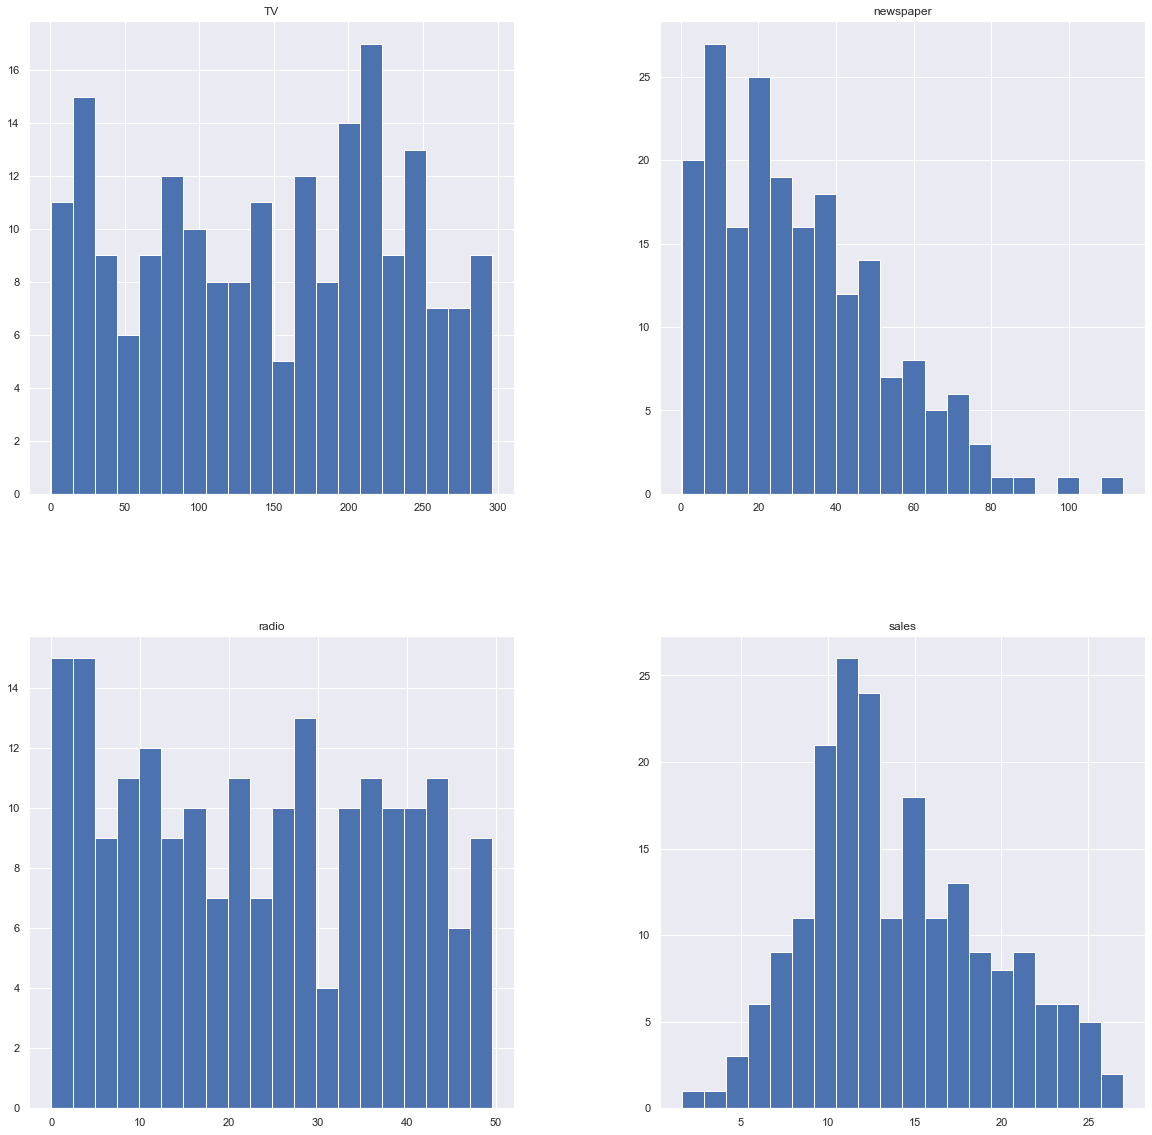

In [6]:
#univariate analysis of te data
df.hist(figsize=(20,20),grid=True,layout=(2,2),bins=20)

In [7]:
#checking the skewness
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [8]:
#removing the skewness of te data
from scipy.stats import boxcox
df['newspaper']=np.sqrt(df['newspaper'])
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,8.318654,22.1
2,44.5,39.3,6.715653,10.4
3,17.2,45.9,8.324662,9.3
4,151.5,41.3,7.648529,18.5
5,180.8,10.8,7.641989,12.9


In [9]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.062388
sales        0.407571
dtype: float64

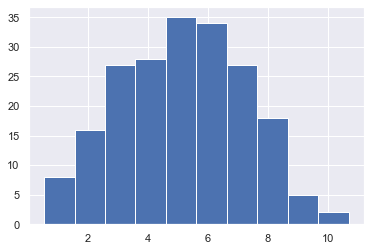

In [10]:
df['newspaper'].hist()

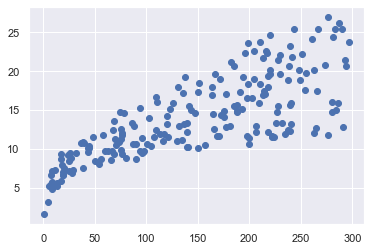

In [11]:
#Bivariate analysis of the data
##plotting the relation between TV and sales
plt.scatter(x='TV',y='sales',data=df)


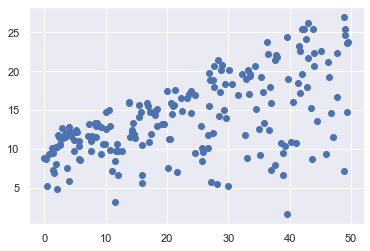

In [12]:
#plotting the relation between radio and sales
plt.scatter(x='radio',y='sales',data=df)


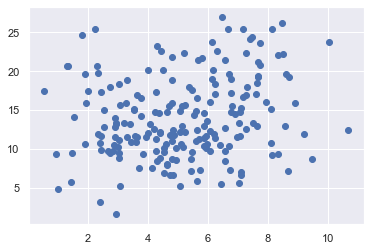

In [13]:
#plotting the relation between newspaper and sales
plt.scatter(x='newspaper',y='sales',data=df)

In [14]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.045976,0.782224
radio,0.054809,1.000000,0.313430,0.576223
newspaper,0.045976,0.313430,1.000000,0.204725
sales,0.782224,0.576223,0.204725,1.000000


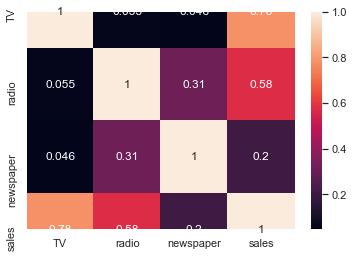

In [15]:
#visualizing correlation through heatmap
hmap=df.corr()

sns.heatmap(hmap,annot=True)



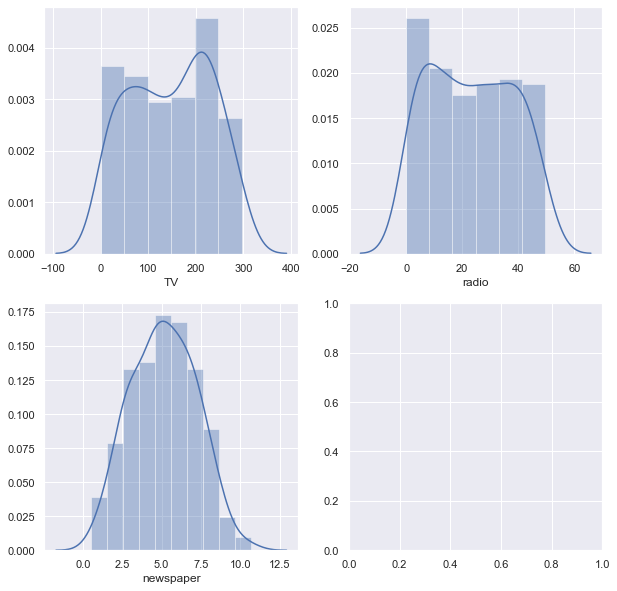

In [16]:
sns.set(font_scale=1.0)
fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10, 10)
sns.set(color_codes=True)
sns.distplot(df['TV'],kde=True,ax=axes[0][0])
sns.distplot(df['radio'],kde=True,ax=axes[0][1])
sns.distplot(df['newspaper'],kde=True,ax=axes[1][0])
plt.show()


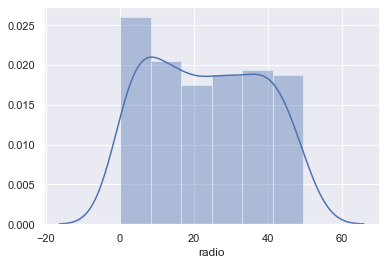

In [17]:
sns.set(color_codes=True)
sns.distplot(df['radio'],kde=True)

In [18]:
x=df.drop(['sales'],axis=1)
x.head()

,TV,radio,newspaper
1,230.1,37.8,8.318654
2,44.5,39.3,6.715653
3,17.2,45.9,8.324662
4,151.5,41.3,7.648529
5,180.8,10.8,7.641989


In [19]:
y=df.iloc[:,3:4]
y.head()

,sales
1,22.1
2,10.4
3,9.3
4,18.5
5,12.9


In [20]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df))

In [21]:
df=df[(z<3).all(axis=1)]
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,8.318654,22.1
2,44.5,39.3,6.715653,10.4
3,17.2,45.9,8.324662,9.3
4,151.5,41.3,7.648529,18.5
5,180.8,10.8,7.641989,12.9


In [22]:
df.shape

(200, 4)

In [23]:
max_rscore=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=r_state)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r_scr=r2_score(y_test,pred)
    print("R2_score corresponding to random state:",r_state,"is:",r_scr)
    if r_scr>max_rscore:
        max_rscore=r_scr
        final_r_state=r_state
print()
print("max accuracy score corresponding to r_state is",final_r_state,"is:",max_rscore)

R2_score corresponding to random state: 42 is: 0.862398473183113
R2_score corresponding to random state: 43 is: 0.9223377779877504
R2_score corresponding to random state: 44 is: 0.8728655523593825
R2_score corresponding to random state: 45 is: 0.9027561196809877
R2_score corresponding to random state: 46 is: 0.8361790498044216
R2_score corresponding to random state: 47 is: 0.8195232600627065
R2_score corresponding to random state: 48 is: 0.9269148843943891
R2_score corresponding to random state: 49 is: 0.830245823656973
R2_score corresponding to random state: 50 is: 0.8579044185239577
R2_score corresponding to random state: 51 is: 0.8618964735414675
R2_score corresponding to random state: 52 is: 0.8883868153669566
R2_score corresponding to random state: 53 is: 0.9081386957466602
R2_score corresponding to random state: 54 is: 0.9201365902440959
R2_score corresponding to random state: 55 is: 0.9139437298954268
R2_score corresponding to random state: 56 is: 0.906384411099249
R2_score corr

In [24]:
models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),SVR(),KNeighborsRegressor()]
model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','SVR','KNeighborsRegressor']
rmsle=[]
r2=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    test_pred=clf.predict(x_test)
    r2_scr=r2_score(y_test,test_pred)
    r2.append(r2_scr)
    rmsle.append(np.sqrt(mean_squared_log_error(test_pred,y_test)))
d={'Modelling Algo':model_names,'RMSLE':rmsle,'R2 score':r2}   
d

{'Modelling Algo': ['RandomForestRegressor',
  'AdaBoostRegressor',
  'BaggingRegressor',
  'SVR',
  'KNeighborsRegressor'],
 'RMSLE': [0.05487803847029518,
  0.07238933710097788,
  0.054281496759815966,
  0.30355520797171354,
  0.04484699068361159],
 'R2 score': [0.9746716847450116,
  0.960727582866577,
  0.9766720961988,
  -0.11688296532797571,
  0.9772419709992901]}

In [25]:
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
r2_scr=r2_score(y_test,y_pred)
rmsle=(np.sqrt(mean_squared_log_error(y_test,test_pred)))
print(r2_scr)
print(rmsle)




0.9772419709992901
0.04484699068361159


In [26]:
#found from the results that the KNN model is giving the better results

In [27]:
from sklearn.externals import joblib
joblib.dump(knn,'sales_channel_regression.pkl')

['sales_channel_regression.pkl']